# Matching against premade celebrities pictures


## Basic Imports

In [5]:
import keras_vggface
print(keras_vggface.__version__)
import mtcnn
print(mtcnn.__version__)
import cv2 
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot 
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

ModuleNotFoundError: No module named 'keras.engine.topology'

### Extracting the face from a photo

In [11]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

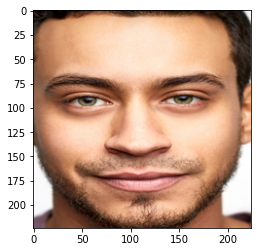

In [12]:
# load the photo and extract the face
pixels = extract_face('im1.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

In [13]:
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

In [15]:
pixels = extract_face('bradpitt.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results

In [16]:
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

b' Brad_Pitt': 97.530%
b' Rob_Lowe': 0.198%
b' Jack_Mackenroth': 0.113%
b' Dieter_Bohlen': 0.105%
b' David_Hallyday': 0.089%


## Matching Against Custom faces

In [17]:
vggmodel = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

94707712/94694792 [==============================] - 9s 0us/step


In [18]:
# face verification with the VGGFace2 model
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

In [19]:
# def extract_face(filename, required_size=(224, 224)):
#     # load image from file
#     pixels = pyplot.imread(filename)
#     # create the detector, using default weights
#     detector = MTCNN()
#     # detect faces in the image
#     results = detector.detect_faces(pixels)
#     # extract the bounding box from the first face
#     x1, y1, width, height = results[0]['box']
#     x2, y2 = x1 + width, y1 + height
#     # extract the face
#     face = pixels[y1:y2, x1:x2]
#     # resize pixels to the model size
#     image = Image.fromarray(face)
#     image = image.resize(required_size)
#     face_array = asarray(image)
#     return face_array

In [20]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
    # extract faces
    faces = [extract_face(f) for f in filenames]
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

In [21]:
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
        print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [24]:
emb_names = get_embeddings(['me_id.jpg','me_test.jpg','not_me_test.jpg'])

In [25]:
me_id =emb_names[0]

In [26]:
is_match(me_id,emb_names[1])

>face is a Match (0.229 <= 0.500)


In [27]:
is_match(me_id,emb_names[2])

>face is NOT a Match (0.579 > 0.500)
